In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [111]:
train_df = pd.read_csv('train.csv')

In [112]:
test_df = pd.read_csv('test.csv')

In [113]:
train_df.head()


,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [114]:
test_df.head()

,Store,Dept,Date,IsHoliday
0,1,1,2012-11-02,False
1,1,1,2012-11-09,False
2,1,1,2012-11-16,False
3,1,1,2012-11-23,True
4,1,1,2012-11-30,False


In [115]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
Store           421570 non-null int64
Dept            421570 non-null int64
Date            421570 non-null object
Weekly_Sales    421570 non-null float64
IsHoliday       421570 non-null bool
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [116]:
train_df['Date'] = pd.to_datetime(train_df['Date'])

In [117]:
test_df['Date'] = pd.to_datetime(test_df['Date'])

In [118]:
features_df = pd.read_csv('features.csv')

In [119]:
stores_df = pd.read_csv('stores.csv')

In [120]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null object
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 711.9+ KB


In [121]:
features_df['Date'] = pd.to_datetime(features_df['Date'])

In [122]:
stores_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
Store    45 non-null int64
Type     45 non-null object
Size     45 non-null int64
dtypes: int64(2), object(1)
memory usage: 1.1+ KB


In [123]:
features_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
Store           8190 non-null int64
Date            8190 non-null datetime64[ns]
Temperature     8190 non-null float64
Fuel_Price      8190 non-null float64
MarkDown1       4032 non-null float64
MarkDown2       2921 non-null float64
MarkDown3       3613 non-null float64
MarkDown4       3464 non-null float64
MarkDown5       4050 non-null float64
CPI             7605 non-null float64
Unemployment    7605 non-null float64
IsHoliday       8190 non-null bool
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 711.9 KB


In [124]:
#Merge train_df and features_df
train_new = pd.merge(train_df,features_df, on=['Store', 'Date', 'IsHoliday'], how='left')

In [125]:
train_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106


In [126]:
train_new = pd.merge(train_new, stores_df, on='Store', how='left')

In [127]:
train_new

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315
5,1,1,2010-03-12,21043.39,False,57.79,2.667,NaN,NaN,NaN,NaN,NaN,211.380643,8.106,A,151315
6,1,1,2010-03-19,22136.64,False,54.58,2.720,NaN,NaN,NaN,NaN,NaN,211.215635,8.106,A,151315
7,1,1,2010-03-26,26229.21,False,51.45,2.732,NaN,NaN,NaN,NaN,NaN,211.018042,8.106,A,151315
8,1,1,2010-04-02,57258.43,False,62.27,2.719,NaN,NaN,NaN,NaN,NaN,210.820450,7.808,A,151315
9,1,1,2010-04-09,42960.91,False,65.86,2.770,NaN,NaN,NaN,NaN,NaN,210.622857,7.808,A,151315


In [128]:
year = train_new['Date'].dt.year

In [129]:
month = train_new['Date'].dt.month

In [130]:
str_sales = train_new.groupby(['Store', year])[['Weekly_Sales']].sum()


In [131]:
str_sales.shape

(135, 1)

In [132]:
str_sales['Weekly_Sales']=np.log(str_sales['Weekly_Sales'])


In [133]:
str_sales.head()

Weekly_Sales
Store Date              
1     2010     18.109782
      2011     18.208995
      2012     18.037985
2     2010     18.372308
      2011     18.406662

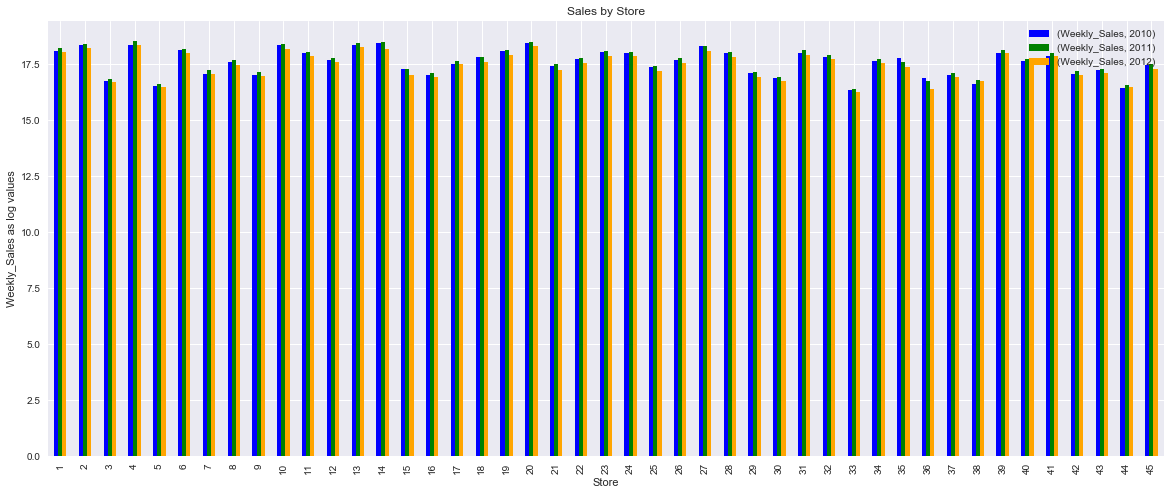

In [134]:
str_sales.unstack(level=1).plot(kind='bar',figsize=(20,8),color=['blue','green','orange'])

plt.xlabel('Store')
plt.ylabel('Weekly_Sales as log values')
plt.title('Sales by Store')
plt.legend(loc=0)

#### Observation: 
### 1) Sales in 2011 is found to be better compared to 2010 and 2012.
### 2) Stores 2, 13, 14, 20, 39 seem to be having more sales than other stores

In [137]:
str_sales_hol = train_new.groupby(['Store', year, 'IsHoliday'])[['Weekly_Sales']].sum()

In [138]:
str_sales_hol.head()


Weekly_Sales
Store Date IsHoliday              
1     2010 False       66806469.75
           True         6472362.25
      2011 False       74201049.28
           True         6720869.55
      2012 False       64737813.26

In [139]:
str_sales_hol['Weekly_Sales']=np.log(str_sales_hol['Weekly_Sales'])

In [141]:
str_sales_hol.head()

Weekly_Sales
Store Date IsHoliday              
1     2010 False         18.017310
           True          15.683052
      2011 False         18.122289
           True          15.720728
      2012 False         17.985856

In [161]:
str_sales_hol.unstack(level=1).unstack(level=1).head()

Weekly_Sales                                                       
Date              2010                  2011                  2012           
IsHoliday        False      True       False      True       False      True 
Store                                                                        
1            18.017310  15.683052  18.122289  15.720728  17.985856  15.058005
2            18.280174  15.942086  18.317578  15.944274  18.165719  15.202330
3            16.650145  14.358553  16.762133  14.389510  16.657096  13.689405
4            18.281901  15.971736  18.438516  16.044750  18.295927  15.319536
5            16.413086  14.155478  16.522266  14.214438  16.415898  13.458677

(0, 25)

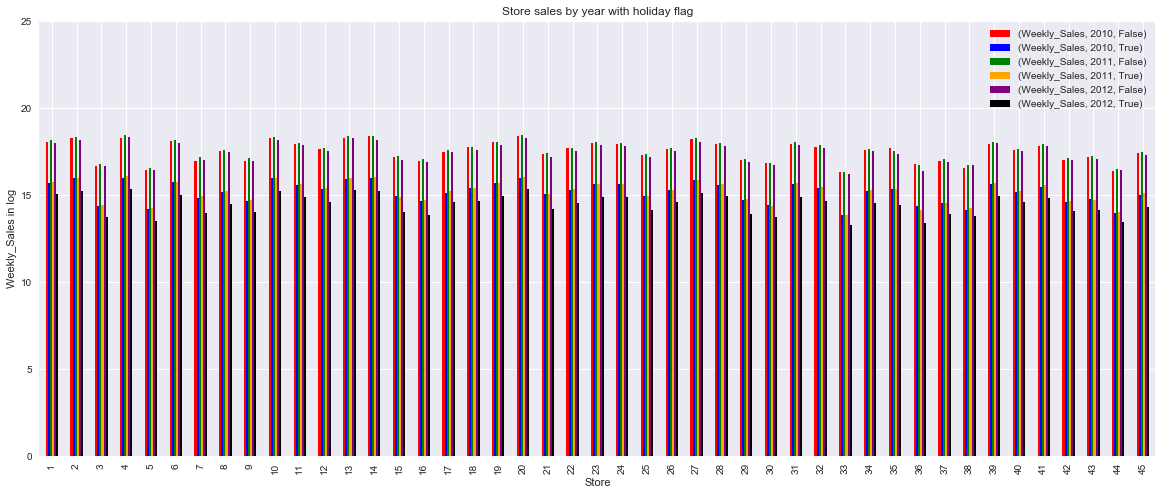

In [160]:
str_sales_hol.unstack(level=1).unstack(level=1).plot(kind='bar',figsize=(20,8),color=['red','blue','green','orange','purple','black'])
plt.ylabel('Weekly_Sales in log')
plt.title('Store sales by year with holiday flag')
plt.legend(loc=0)
plt.ylim(0,25)

#### Observation:
#### 1) Sales is seen to be high during holidays, for all 3 years in observation


In [162]:
train_df.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [250]:
#Group by store 1
str_sales_month = train_new.groupby(['Store', month])[['Weekly_Sales']].sum()

In [251]:
str_sales_month.head()

Weekly_Sales
Store Date              
1     1      11203741.49
      2      19505306.58
      3      20380666.86
      4      21623140.34
      5      18505332.90

In [253]:
str_sales.loc[([1,10], [2010,2012]),:]

Weekly_Sales
Store Date              
1     2010     18.109782
      2012     18.037985
10    2010     18.363816
      2012     18.175146

In [259]:
str_sales_month.loc[(slice(1), slice(1,12)),:]

Weekly_Sales
Store Date              
1     1      11203741.49
      2      19505306.58
      3      20380666.86
      4      21623140.34
      5      18505332.90
      6      20299636.04
      7      20706084.02
      8      20118558.27
      9      19331717.78
      10     19468556.79
      11     13350519.89
      12     17909547.89

In [268]:
train_df.loc[0:5,'Weekly_Sales']

0    24924.50
1    46039.49
2    41595.55
3    19403.54
4    21827.90
5    21043.39
Name: Weekly_Sales, dtype: float64

In [283]:
str_sales.loc[(slice(1),slice(2010)),'Weekly_Sales']

Store  Date
1      2010    18.109782
Name: Weekly_Sales, dtype: float64

In [287]:
train_new.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,A,151315


(array([ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.]),
 array([ 17.60978234,  17.70978234,  17.80978234,  17.90978234,
         18.00978234,  18.10978234,  18.20978234,  18.30978234,
         18.40978234,  18.50978234,  18.60978234]),
 <a list of 10 Patch objects>)

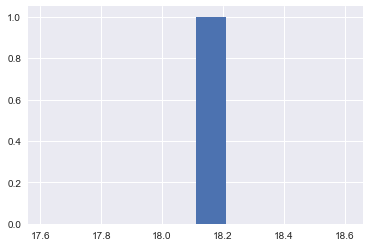

In [315]:
#train_new.loc[((train_new['Store'])==1) ]#['Weekly_Sales'] 
#(train_new['Weekly_Sales'].loc[(train_new['Date'].dt.year) == 2010])

plt.hist(np.log(train_new[(train_new['Store']==1) & (train_new['Date'].dt.year == 2010) ]['Weekly_Sales'].sum()))

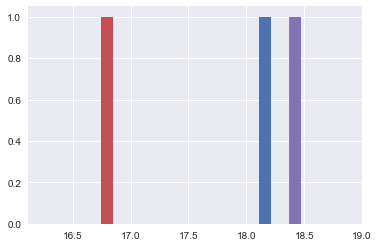

In [320]:
#fig, ax = plt.subplots(5,3, figsize=(10,8))
for s in range(1,5):
    yr = 2010
    plt.hist(np.log((train_new[(train_new['Store']==s) & (train_new['Date'].dt.year == yr) ]['Weekly_Sales'].sum())))
        #yr += 1
    s += 1    
#plt.tight_layout()    